In [1]:
#pip install tensorflow==2.7.0

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Una red neuronal con un layer (una capa) y una neurona
# Creamos el modelo usando keras sequencial class. que nos permite crear una red neuronal como
# una secuencia de layers
# usamos Dense to build a simple network
model = Sequential([
    Dense(units = 1, input_shape = [1])
])

# when we COMPILE a network we need to specify to functions: a loss function and an optimizer
# it will repeat the guessing process until usando la funcion de perdida y tratando de 
# minimizar el error. eso se va a repetir en base a la cantidad de epochs  
# compiling the model:
### sgd: stochastic gradient descent
### loss: mean_squared_error
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

## Declare model inputs and outputs for training
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype= float)

## Training a model
model.fit(xs, ys, epochs=500)

## Make a prediction
print(model.predict([10.0]))

[fashion-nmist documentacion](https://github.com/zalandoresearch/fashion-mnist)

In [ ]:
## Introduction to computer vision
## Using Fashion n-mist
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

help(fashion_mnist.load_data)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

In [ ]:
import numpy as np
print('Cantidad de clases en el dataset: {}'.format(np.unique(train_labels).shape[0]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Index of the images
index = 42

# Seteamos el número de caracteres por fila cuando lo printeamos
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'Label: {train_labels[index]}')
print(f'Image Array: {train_images[index]}')

## Visualize image
plt.imshow(train_images[index])

In [ ]:
help(plt.imshow)

In [ ]:
## Normalizamos los valores entre 0 y 1
train_images = train_images / np.max(train_images)
test_images = test_images /np.max(test_images)

In [ ]:
## Build the classification model
from tensorflow import keras
model = keras.models.Sequential(
                    [
                        keras.layers.Flatten(),# shape of the input data
                        keras.layers.Dense(128, activation = tf.nn.relu),
                        keras.layers.Dense(10, activation = tf.nn.softmax) # shape of the classes
                    ]

)

In [ ]:
## Sequential: That defines a sequence of layers in the neural network
## Flatten: Toma las imagenes que estan en matrices de 28*28 y lo transforma en 1-dimensinal array
## Dense: Add a layer network
## Relu: Pasa solo valores de 0 o mayores a 0 a la siguiente capa
##if x > 0: 
##  return x
##else: 
##  return 0
## Softmax: Softmax takes a list of values and scales these so the sum of all elements 
# will be equal to 1. When applied to model outputs, you can think of the scaled values as 
# the probability for that class. Examples:

# Declaramos algunos inputs de ejemplo y los transformamos a tensores
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the input to softmax activation function
outputs = keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs {sum}')

# Get the index of the highest value
prediction = np.argmax(outputs)
print(f'class with the highest probability: {prediction}')


In [ ]:
from tensorflow import keras
# Creamos una red.
# Primero tenemos la capa inicial: input_data
# Luego tenemos la capa oculta
# Luego tenemos la capa final (tiene una neurona por cada clase)

In [ ]:
print(tf.__version__)

In [ ]:
# Construimos el modelo
# primero lo compilamos:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)
# hacemos el fit del modelo
model.fit(train_images, train_labels, epochs=5)

In [ ]:
## Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

In [ ]:
# Construimos el modelo
# primero lo compilamos: #Optimizamos el modelo con mas epochs
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)
# hacemos el fit del modelo
model.fit(train_images, train_labels, epochs=10)

In [ ]:
# Obtuvimos mejores métricas que en el caso anterior
model.evaluate(test_images, test_labels)

In [ ]:
# Using callbacks to control training
### tf.keras.callbacks.Callback base class.
###You can create a callback by defining a class that inherits the tf.keras.callbacks.Callback base class. 
# From there, you can define available methods to set where the callback will be executed. For instance below, 
# you will use the on_epoch_end() method to check the loss at each training epoch.

class myCallback(keras.callbacks.Callback): # Clase que hereda de tf.keras.callbacks.Callback 
    def on_epoch_end(self, epoch, logs={}):
        """
        Halts the training after reach 60 percent accuracy

        Args:
            epoch (integer) - index of epoch (required but unused in the function definition below)
            logs (dict) - metric results from training epochs
        """

        # Check accuracy
        if(logs.get('loss')<0.4):

            # Stop if threshold is met
            print('\n Loss is lower than 0.4 so cancelling training!')
            self.model.stop_training = True

# Instantiate Class
callbacks = myCallback()

In [ ]:
# Defino nuevamente el modelo
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

# Compilamos el modelo
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
            )

In [ ]:
# Train the model with a call back
model.fit(train_images, train_labels, epochs=10, callbacks = [callbacks])

In [ ]:
## Convolutional Neural Networks
### Looks for the most importance features
### La convolución es una especie de transformación que permite dar mayor enfasís o peso a ciertas variables.
### filtrando y comprimiendo: Para esto, definimos convolutional and pooling layers. At the top of the neurons.
### El objetivo de las convoluciones si simplemente reducir los features y quedarnos con las más importantes.
### Converting Deep Neural Network to Convolutional Neural Network by adding convolutional networks at the top

In [ ]:
## convolutions and pooling
# Shallow Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

# Loading fashion_mnist dataset
fmnist = fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fmnist.load_data()

# Normalize the pixes values
train_images = train_images/255.0
test_images = test_images/255.0


In [ ]:
# Define the model
model = keras.models.Sequential(
    [
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)
    ]
)

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print('Model Training:\n')
model.fit(train_images, train_labels, epochs=5)

# Evaluate on the test set
print('Model Evaluation:\n')
test_loss = model.evaluate(test_images, test_labels)

In [ ]:
# Define the model
# Para añadir convoluciones se añaden convolutions and max pooling
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        keras.layers.MaxPool2D(2,2),
        # Add the same layers as before
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)
    ]
) 

# Print the model summary
print(model.summary())

# Use some setting
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train model
print('\n Train model')
model.fit(train_images, train_labels)

# Evaluate on test set
print('\n Model evaluation')
test_loss = model.evaluate(test_images, test_labels)


In [ ]:
print(test_labels[:100])

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE = 2
SECOND_IMAGE = 3
THIRD_IMAGE = 5
CONVOLUTION_NUMBER = 6

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0,:,:, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f2[0,:,:, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[2,x].grid(False)

## Adding a callback to finish training when we get accuracy of: 
   - 0.88 

In [ ]:
# Adding a callback to finish training when we get accuracy of:  0.88 
class myCallback(keras.callbacks.Callback): # Clase que hereda de tf.keras.callbacks.Callback 
    def on_epoch_end(self, epoch, logs={}):
        """
        Halts the training after reach 60 percent accuracy

        Args:
            epoch (integer) - index of epoch (required but unused in the function definition below)
            logs (dict) - metric results from training epochs
        """

        # Check accuracy
        if(logs.get('accuracy')>0.88):

            # Stop if threshold is met
            print('\n Accuracy is higher than 0.88 so cancelling training!')
            self.model.stop_training = True

# Instantiate Class
callbacks = myCallback()

In [ ]:
# Use some setting
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
print('\n Train model')
model.fit(train_images, train_labels, callbacks = [callbacks])

# Evaluate on test set
print('\n Model evaluation')
test_loss = model.evaluate(test_images, test_labels)

## Exploring Convolutions
We are using ascent image

In [ ]:
from scipy import misc

ascent_image = misc.ascent()

In [ ]:
## drawing the image using matplotlib
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [ ]:
type(ascent_image)
## the image is created in a numpy array. We are copying the array in a transformed_image variable
import numpy as np

# Copy the image to numpy array
image_transformed = np.copy(ascent_image)

# Get the dimensions of the image

size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

Now we can create a filter 3*3

In [ ]:
# Experiment with different values and see the effect
filters =  [[0, 1, 0],[1, -4, 1],[0, 1, 0]]

weight = 1

Now we can create a convolution. You will iterate over the image. leaving 1 pixel margin and multiplying each of the neighbors of the current pixel by the value defined in the filter (i.e. the current pixel´s neighbors above it and to the left will be multiplied by the top left item in the filter, etc.).

You´ll then multiply the result by the weight, and then ensure the result is in the range 0-255.

Finally you´ll load the new value into transformed image.

In [ ]:
# Iterate over the image
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution = convolution + (ascent_image[x-1, y -1] *filters[0][0])
        convolution = convolution + (ascent_image[x-1, y] *filters[0][1])
        convolution = convolution + (ascent_image[x-1, y +1] *filters[0][2])
        convolution = convolution + (ascent_image[x, y -1] *filters[1][0])
        convolution = convolution + (ascent_image[x, y] * filters[1][1])
        convolution = convolution + (ascent_image[x, y+1] * filters[1][2])
        convolution = convolution + (ascent_image[x+1, y -1] *filters[2][0])
        convolution = convolution + (ascent_image[x+1, y] * filters[2][1])
        convolution = convolution + (ascent_image[x+1, y+1] * filters[2][2])
        
        # Multiply by weight
        convolution = convolution *weight
        
        # Check the boundaries of the pixels values
        if(convolution<0):
            convolution = 0
        if(convolution>255):
            convolution = 255
            
        # Load into transformed image
        image_transformed[x,y] = convolution

In [ ]:
## drawing the image transformed using matplotlib
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(image_transformed)
plt.show()

In [ ]:
ascent_image[4, 4]

### Effect of Max Pooling
The next cell show a (2,2) pooling. The idea here is to iterate over the image, and look at the pixel and its immediate neighbors to the right, beneath, right-beneath. It will take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You´ll see that the features get maintained depide the compresion

In [ ]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank images with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        
        # Store all te pixel values in (2,2) pool
        pixels = []
        pixels.append(image_transformed[x,y])
        pixels.append(image_transformed[x+1,y])
        pixels.append(image_transformed[x,y+1])
        pixels.append(image_transformed[x+1,y+1])
        
        # Get only the largest value and assign the reduced image
        newImage[int(x/2), int(y/2)] = max(pixels)

# Plot the new image
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(image_transformed)
plt.show()

## Convolutional Networks to use Complex Images

In [ ]:
# downloading and compress Horses-Humans dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

In [ ]:
# Unzip the file using unzip module
import zipfile

#Unzip the dataset
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')
zip_ref.close()

In [3]:
import os
# Directory with our training horses picture
train_horse_dir = os.path.join('horse-or-human/horses/')
# Directory with our training humans picture
train_human_dir = os.path.join('horse-or-human/humans/')

Now see what the filenames look like in the ```horses``` and ```human``` training directories

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse27-2.png', 'horse34-6.png', 'horse46-1.png', 'horse46-8.png', 'horse43-3.png', 'horse42-5.png', 'horse40-6.png', 'horse41-4.png', 'horse03-8.png', 'horse06-6.png']
['human15-13.png', 'human08-23.png', 'human06-05.png', 'human08-08.png', 'human09-26.png', 'human02-29.png', 'human17-03.png', 'human03-28.png', 'human09-19.png', 'human17-10.png']


You can also find out the total number of horses and humans in the directories

In [5]:
print('total training horses images: ', len(os.listdir(train_horse_dir)))
print('total training human images: ', len(os.listdir(train_human_dir)))

total training horses images:  500
total training human images:  527


Now take a look at a few pictures to get a better sense of what they look like. First, configure the matplotlib parameters.

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for out graph; we will output images in a 4*4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 6

Now, display a bath of 8 horses and 8 human images. You can rerun the cell to see a fresh batch each time:

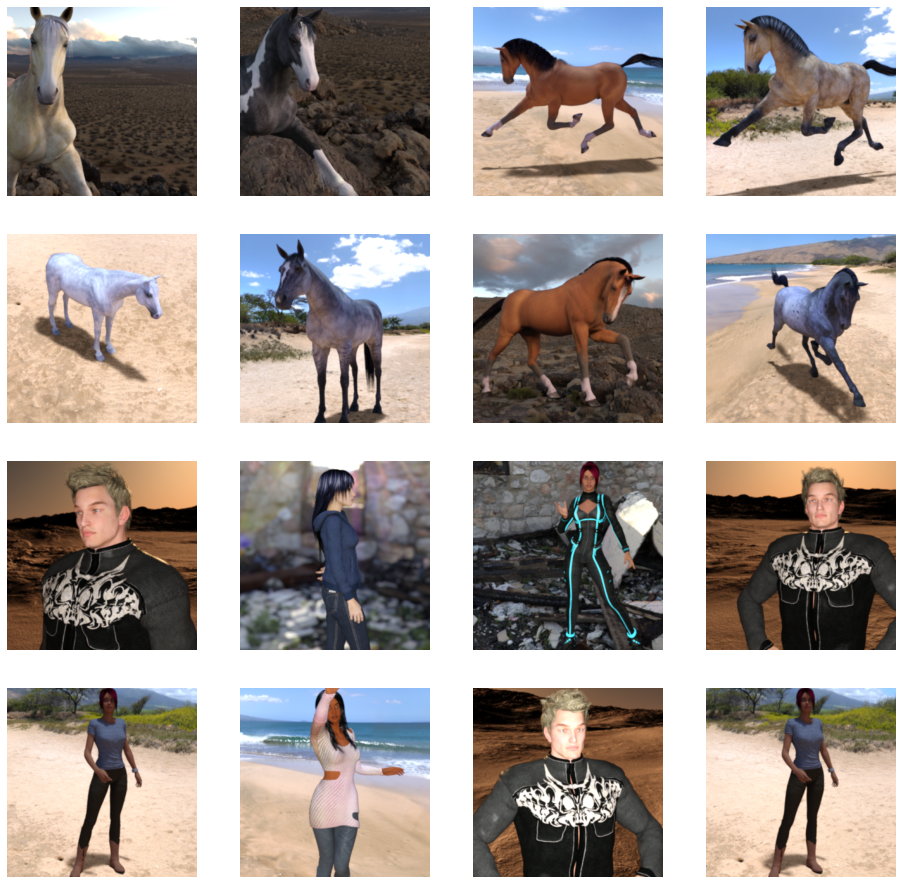

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building a small model from scrach

In [8]:
## model
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
        # The input shape is the desired size of the image 300*300 with 3 bytes color
        # This is the first convolution
        keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (300,300,3)),
        keras.layers.MaxPooling2D(2,2),
        # The second convolution
        keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        keras.layers.MaxPooling2D(2,2),
        # The third convolution
        keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        keras.layers.MaxPooling2D(2,2),
        # The fourth convolution
        keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        keras.layers.MaxPooling2D(2,2),
        # The fifth convolution
        keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        keras.layers.MaxPooling2D(2,2),
        # Flatten the result to feed into a DNN
        keras.layers.Flatten(),
        # 512 neuron hiden layer
        keras.layers.Dense(512, activation = 'relu'),
        # Only 1 output neuron. It will contain a value from 0-1  (0 for horses and 1 for humans)
        keras.layers.Dense(1 , activation = 'sigmoid')
])

2023-02-03 19:20:33.519397: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-03 19:20:33.519459: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ds-dev-ml-prepago-cash-in): /proc/driver/nvidia/version does not exist
2023-02-03 19:20:33.521348: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


You can review the output architecture and the output shapes with ```model.summary()```

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

We train the model with ```binary_crossentropy``` loss because is a binary classification problem, and the final activition is a sigmoid. You will use ```rmsprop``` optimizer with a learning rate of ```0.001```.

**NOTE:** In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy']
             )

## Data Preprocessing

Set up the data generators that will read pictures in the source folders, convert then to ```float32``` tensors, and feed them to the model. You´ll have one generator for the training images and one for validation images. This generators will yield batches of images of size 300 * 300 and their labels (binary) 

Input images should be normalized before used them in neural networks, in values between ```[0 , 1]```

In Keras, this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

In [11]:
# allow as to create examples of horses and human images based on training and validation directories
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255) # resizing the image

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                'horse-or-human',
                target_size = (300,300),
                batch_size = 128,
                # Since we use binary_crossentropy loss, we need binary labels
                class_mode = 'binary')

Found 1027 images belonging to 2 classes.


## Training
You can start training for 15 epochs.
The ```loss``` and ```accuracy``` are great indicators of the process in training. ```loss``` measures the current model prediction against the known labels, calculating the result. ```accuracy```, on the other hand, is the portion of the correct guesses. 

In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch=8,
          epochs = 5,
          verbose = 1
        )

Epoch 1/5


2023-02-03 19:20:40.685531: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 727482368 exceeds 10% of free system memory.
2023-02-03 19:20:43.895167: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 708083712 exceeds 10% of free system memory.
